In [14]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import scipy as sc
import scipy.stats as stat
from scipy import stats

# Defind values. E.g. Gravity

In [8]:
#   expected g
g=9.8

#   measured Lengths L 
L = (10, 25, 50, 75)
#   turn this ish into an array
L = np.array (L,dtype=np.float64)


#measured g at different L and uncertianties of g
g_meas = np.array([8.60341904, 9.10147158, 9.87179984, 9.86823165],dtype=np.float64)


# is this the variance or the std?
error = np.array([0.67636208, 0.4559837,  0.36170647, 0.29458552],dtype=np.float64)

# Define Function

In [4]:
# define my model function
def Linefunc(L, g): 
    #This will take L values and return g values
    return g

In [5]:
# Find fit
parms, covariance = sc.optimize.curve_fit(Linefunc,L,g_meas,sigma=error,p0=None,absolute_sigma=True)

In [7]:
# print values
for i in range(0,len(parms)):
    print('param ',i,' = ',parms[i], '+/-', np.sqrt(covariance[i,i]))

print('Just one paramater: g')

param  0  =  9.62263694865334 +/- 0.19550726552273417
Just one paramater: L


In [19]:
# Fitted line
fitline= Linefunc(L, *parms)


$$
\bar{X} = \Sigma \left(\frac{x_i}{\sigma_{x_i}^2} \cdot \frac{1}{\Sigma \frac{1}{\sigma_{x_i}^2}} \right)
$$

> $$\sigma_q^2 = \frac{1}{\Sigma_i^3(\frac{1}{\sigma_{qi}^2})}$$

$$
Weights = \sum{\frac{1}{\sigma}}
$$

$$
\bar{g_{weightAv}} = \frac{1}{\sum{\frac{1}{\sigma}}} \cdot \sum{\frac{x_{measured}}{\sigma}}
$$

$$
\sigma_{\bar{g_w}} = \sqrt{\frac{1}{\sum{\frac{1}{\sigma^2}}}}
$$

In [20]:
# Now, calculate weighted average of g measured.

weights = np.sum(1 / error)

g_waverage = (1/weights)*np.sum(g_meas / error)

g_waverage_STD = m.sqrt(1/np.sum(1/(error*error)))

print('g weighted average = ',g_waverage, '+/-', g_waverage_STD)

g weighted average =  9.507966138081088 +/- 0.1955072644806284


# $Chi^2$ Check, if reduced~1 

In [18]:
# now for some chi square magic to see how well we did 

chisq = sum( (g_meas-fitline)**2 / error**2 )

ndf = len(L)-len(parms)

chisq_reduced = chisq/float(ndf)

cdf = stat.chi2.cdf(chisq, df = ndf)

# For a Chisquare with a given number of degrees of freedom the p-test value: 
#       is just one minus the cummilative distribtion 
#       fucntion (CDF) of the chisquare probabilty distribution evaluated at the calculated value of ChiSq
pvalue = 1-cdf

print('Chi-square: ',chisq)
print('Degrees of freedom: ',ndf)
print('Reduced chi-square: ',chisq_reduced)
print('CDF: ', cdf)
print('p-test value (not 2tail bc this is not Gausian/symmentric) : ',pvalue)


Chi-square:  4.746679697497241
Degrees of freedom:  3
Reduced chi-square:  1.5822265658324135
CDF:  0.8086855434440542
p-test value (not 2tail bc this is not Gausian/symmentric) :  0.1913144565559458


# Check Zscore

$$
Z_{score} = \frac{g_{expected}- g_{Avmeasured}}{\sigma_{gAv}}
$$

In [21]:
# Comapre measured and predicted value using Gaussian z-score.

# A value that is normalized and can be used on the standard distribution 
Zscore = (g - g_waverage)/g_waverage_STD

print('Z score = ',Zscore)

cdf = sc.stats.norm.cdf(Zscore,0,1)

print ("CDF = ",sc.stats.norm.cdf(Zscore,0,1))

if cdf>0.5:
    pvalue_2t = 2*(1-cdf)
else :
    pvalue_2t=2*(cdf)

print ("two tailed p-value = ",pvalue_2t)

Z score =  1.4937238403632256
CDF =  0.9323760926727442
two tailed p-value =  0.13524781465451152


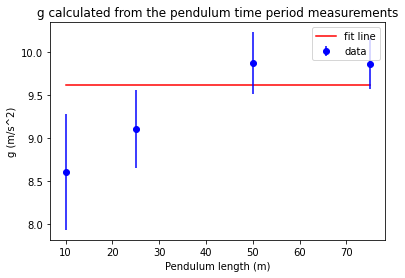

In [22]:
# Plot 
#plot the data and the fit line
plt.title("g calculated from the pendulum time period measurements") 
plt.xlabel("Pendulum length (m)") 
plt.ylabel("g (m/s^2)") 


# this will just make a line for our fited line, since it's only one value
y_values = np.full((len(g_meas)),fitline)
plt.plot(L, y_values, markersize=2 ,label="fit line", color="red")
# Here the errorbar plot wil show us the relavance 
plt.errorbar(L,g_meas,yerr=error,fmt='ob',label="data") 

plt.legend()